<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:28px; border-radius:8px; box-shadow:0 2px 8px #00004733;" src='alinco.png' width="120"/>
<div style="margin-left:150px;">
<h1 style="color:#000047; font-size:2.3em; margin-bottom:0;">Actividad 2 (Uriel Juarez)</h1>
<h2 style="color:#003366; font-size:1.3em; margin-top:0;">Identificación, Preprocesamiento y Distribución de los datos</h2>
</div>
<br style="clear:both"/>
</div>



<div style="border-left:6px solid #000047; padding:18px; margin-top:18px; background:#f5f5f5; border-radius:8px;">
<span style="font-size:1.1em;"><b>Objetivo:</b> 
Practicar los métodos vistos en clase para la identificación de datos faltantes, outliers y análisis de la distribución de los datos, utilizando herramientas estadísticas y visuales modernas.</span>
<ul style="margin-top:10px;">
<li>Aplicar técnicas de análisis exploratorio de datos (EDA) para comprender la calidad y forma de los datos.</li>
<li>Identificar y tratar valores atípicos (outliers) tanto univariados como multivariados.</li>
<li>Visualizar y comparar distribuciones para tomar mejores decisiones en el preprocesamiento.</li>
</ul>
</div>

<div style="margin-top:18px; background:#f0f7ff; border-radius:8px; padding:14px; border:1px solid #b3c6ff;">
<b>Instrucciones generales:</b>
<ul style="margin-bottom:0;">
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>la librería creada (HyAIA) en clase</b> para contestar lo que se pide.</li>
<li>Incluye comentarios y conclusiones breves en cada sección para reflexionar sobre los resultados obtenidos.</li>
<li>Recuerda que puedes agregar celdas de código o markdown adicionales si lo consideras necesario para explicar tu proceso.</li>
</ul>
</div>

<div style="margin-top:18px; background:#fffbe6; border-radius:8px; padding:12px; border:1px solid #ffe066;">
<b>Tip:</b> Aprovecha las funciones de visualización para interpretar mejor los resultados y justificar tus respuestas.
</div>

<h2 style="color:#003366; margin-top:0;">1. Medidas de posición y de forma <span style='font-size:0.7em; color:#888;'>&#128202;</span></h2>
<p style="font-size:1.1em;">
En esta sección analizarás el <b>dataset <code>tips</code> de la librería <code>seaborn</code></b> para practicar el análisis de calidad, distribución y forma de los datos.
</p>
<ul style="font-size:1.05em;">
<li><b>1.</b> <span style='color:#000047;'>Carga el dataset:</span> <code>sns.load_dataset('tips')</code></li>
<li><b>2.</b> <span style='color:#000047;'>Reporte de calidad:</span> Usa <code>dqr()</code> para obtener un resumen de los datos.</li>
<li><b>3.</b> <span style='color:#000047;'>Asimetría y curtósis:</span> Calcula estos valores para cada columna numérica.</li>
<li><b>4.</b> <span style='color:#000047;'>Visualización:</span> Grafica la distribución y medidas de forma de <code>total_bill</code>.</li>
<li><b>5.</b> <span style='color:#000047;'>Comparación por día:</span> Compara asimetría y curtósis de <code>total_bill</code> por <code>day</code>.</li>
<li><b>6.</b> <span style='color:#000047;'>Cuartiles:</span> Calcula los cuartiles de <code>tip</code>.</li>
<li><b>7.</b> <span style='color:#000047;'>Diagrama de cajas:</span> Visualiza <code>tip</code> y comenta tus observaciones.</li>
</ul>
<div style="margin-top:12px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Consejo:</b> Utiliza gráficos como histogramas, boxplots y tablas resumen para enriquecer tu análisis.
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import skew, kurtosis
import sys
sys.path.append("..")              
sys.path.append("../Package_HyAIA") # ruta del paquete

from Package_HyAIA.HyAIA import HyAIA

In [15]:
## 1. Load the "tips" dataset from seaborn
df = sns.load_dataset("tips")
## 2. Create an instance of HyAIA with the loaded dataset
h = HyAIA(df)
h.df_dqr.head()

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Is_categorical,Categories,Max_values,Min_values,Mean_values,Std_values
total_bill,total_bill,float64,244,0,229,False,NaN,50.81,3.07,19.785943,8.902412
tip,tip,float64,244,0,123,False,NaN,10.0,1.0,2.998279,1.383638
sex,sex,category,244,0,2,False,NaN,NaN,NaN,NaN,NaN
smoker,smoker,category,244,0,2,False,NaN,NaN,NaN,NaN,NaN
day,day,category,244,0,4,True,"Sun, Sat, Thur, Fri",NaN,NaN,NaN,NaN


In [ ]:

#3. Calculate skewness and kurtosis for numerical columns
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include="number")

# Calcular asimetría
asimetria = num_cols.skew()

# Calcular curtosis
curtosis = num_cols.kurt()

# Mostrar resultados
print("Asimetría:\n", asimetria)
print("\nCurtosis:\n", curtosis)


Asimetría:
 total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

Curtosis:
 total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64


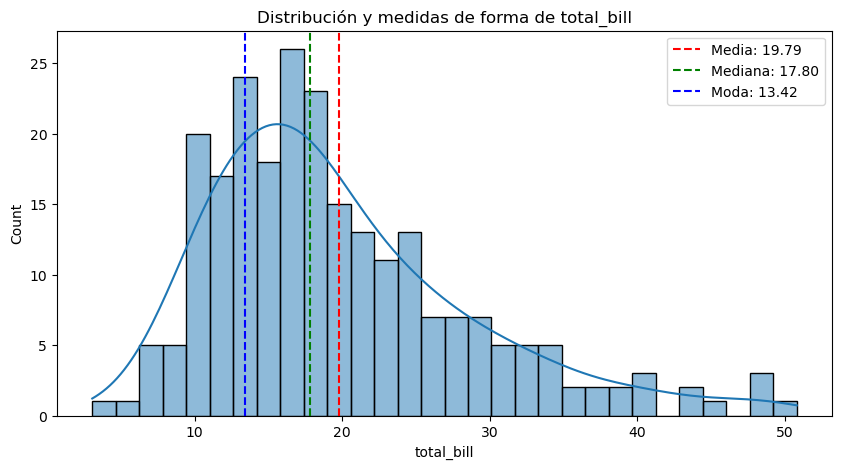

In [ ]:
#4. Visualize the distribution of a selected numerical column with its mean, median, and mode
col = "total_bill"
x = df[col]

plt.figure(figsize=(10,5))
sns.histplot(x, kde=True, bins=30)

plt.axvline(x.mean(), color='red', linestyle='--', label=f"Media: {x.mean():.2f}")
plt.axvline(x.median(), color='green', linestyle='--', label=f"Mediana: {x.median():.2f}")
plt.axvline(x.mode()[0], color='blue', linestyle='--', label=f"Moda: {x.mode()[0]:.2f}")

plt.title("Distribución y medidas de forma de total_bill")
plt.legend()
plt.show()

In [ ]:
#La distribucion es asimetrica positiva.

      asimetria  curtosis
day                      
Thur   1.327625  1.581241
Fri    1.210437  1.206919
Sat    1.240247  1.550424
Sun    0.806750  0.317047


C:\Users\uri3l\AppData\Local\Temp\ipykernel_32364\2820446915.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_day = df.groupby("day")["total_bill"].agg(


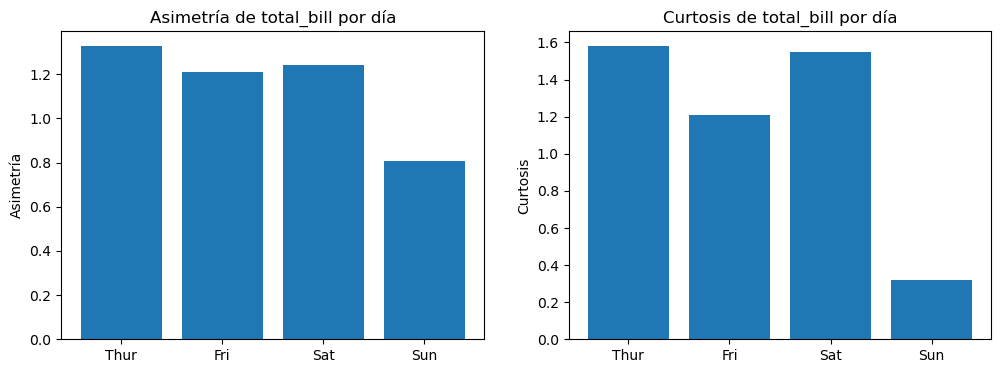

In [ ]:
# 5.- Comparacion por dia
# # Agrupar por día y calcular
stats_day = df.groupby("day")["total_bill"].agg(
    asimetria=lambda x: skew(x),
    curtosis=lambda x: kurtosis(x, fisher=True)
)

print(stats_day)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Asimetría
ax[0].bar(stats_day.index, stats_day["asimetria"])
ax[0].set_title("Asimetría de total_bill por día")
ax[0].set_ylabel("Asimetría")

# Curtosis
ax[1].bar(stats_day.index, stats_day["curtosis"])
ax[1].set_title("Curtosis de total_bill por día")
ax[1].set_ylabel("Curtosis")

plt.show()


In [ ]:
#6. Calculate quartiles for a selected numerical column
# # Cuartiles de la columna tip
q1 = df["tip"].quantile(0.25)   # 1er cuartil (25%)
q2 = df["tip"].quantile(0.50)   # 2º cuartil = mediana (50%)
q3 = df["tip"].quantile(0.75)   # 3er cuartil (75%)

print("Q1:", q1)
print("Q2 (mediana):", q2)
print("Q3:", q3)

Q1: 2.0
Q2 (mediana): 2.9
Q3: 3.5625


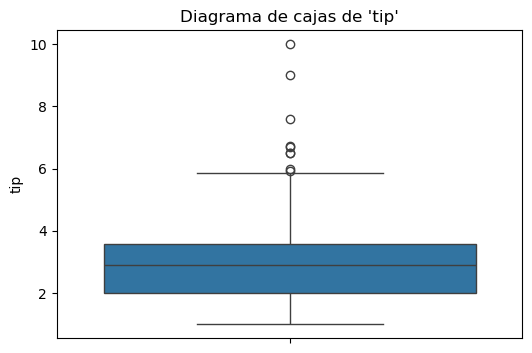

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(y="tip", data=df)   # o x="tip" si lo quieres horizontal
plt.title("Diagrama de cajas de 'tip'")
plt.ylabel("tip")
plt.show()

Observaciones: El diagrama de caja muestra que las propinas en el dataset suelen ser bajas, distribuidas entre 2 y 4
Sin embargo, existen algunas propinas  altas, lo que genera asimetría positiva y varios outliers.

<h2 style="color:#b36b00; margin-top:0;">2. Datos Atípicos (Outliers) <span style='font-size:0.7em; color:#888;'>&#9888;&#65039;</span></h2>
<p style="font-size:1.1em;">
En este apartado identificarás y analizarás <b>outliers univariados y multivariados</b> usando diferentes datasets y técnicas.
</p>
<div style="background:#fff2cc; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px; margin-bottom:10px;">
<b>Univariado:</b> <br>
Utiliza el dataset <code>ds_salaries.csv</code> (en la misma ruta que este notebook).
<ol style="font-size:1.05em;">
<li><b>Análisis exploratorio:</b> Visualiza la distribución y diagramas de caja de cada variable. Agrega comentarios sobre tus hallazgos.</li>
<li><b>Identificación de outliers:</b> Aplica métodos vistos en clase según la distribución de cada variable.</li>
</ol>
</div>
<div style="background:#ffe6e6; border-left:4px solid #b30000; padding:10px 18px; border-radius:8px;">
<b>Multivariado:</b> <br>
Descarga y utiliza el dataset <a href="https://drive.google.com/file/d/19dZnyQcZzrQMkGWKETd-577r_SAN-Vfv/view?usp=drive_link" target="_blank"><code>credit_card.csv</code></a>.
<ol style="font-size:1.05em;">
<li><b>Identificación de outliers multivariados:</b> Aplica técnicas multivariadas vistas en clase para detectar valores atípicos.</li>
</ol>
</div>


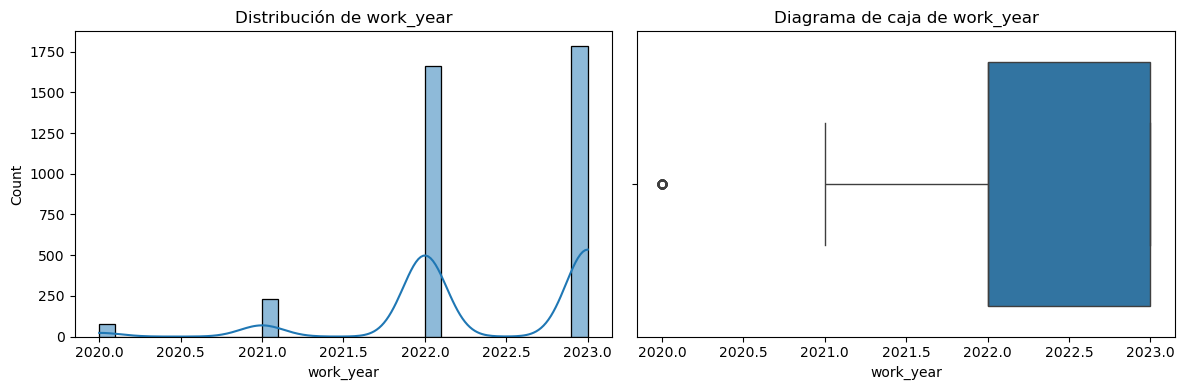

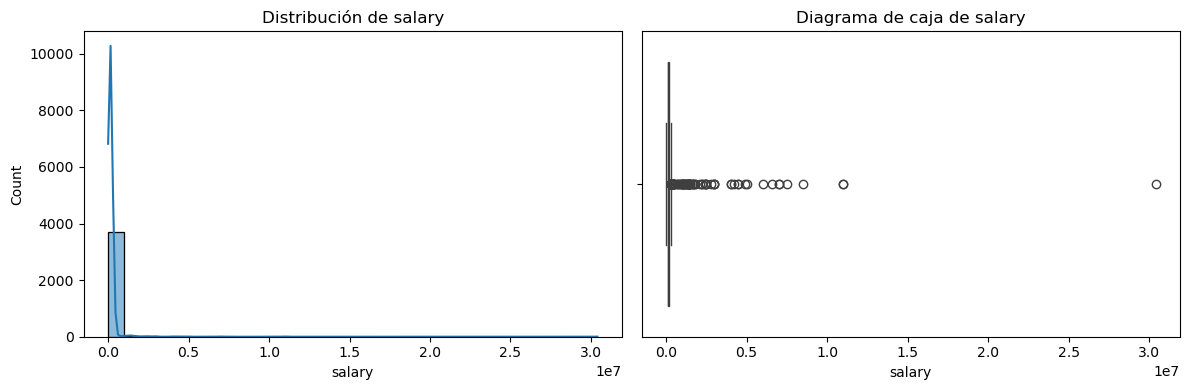

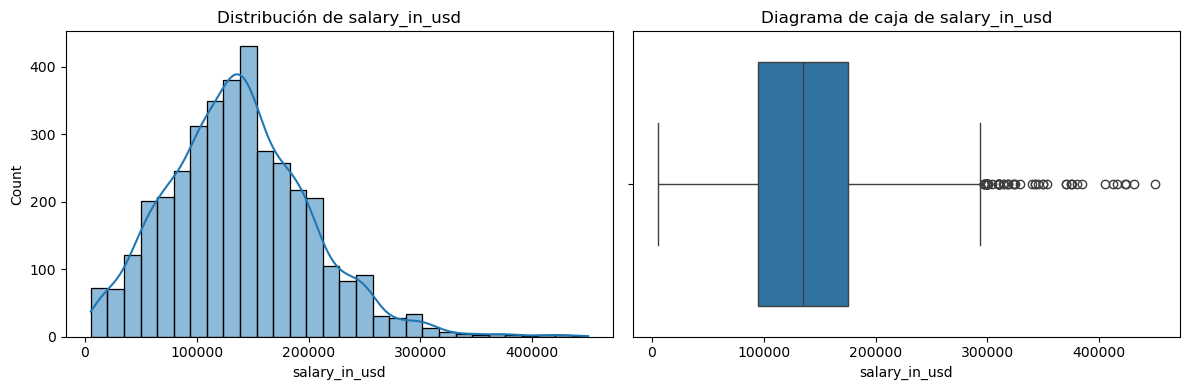

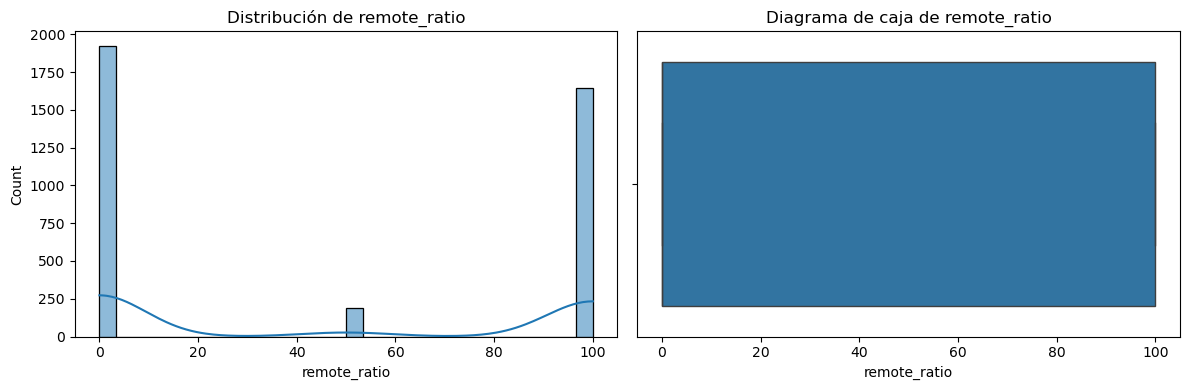

In [34]:
df_salaries = pd.read_csv("ds_salaries.csv")

numeric_cols = df_salaries.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histograma + KDE
    plt.subplot(1,2,1)
    sns.histplot(df_salaries[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_salaries[col])
    plt.title(f"Diagrama de caja de {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

Observaciones: 
* En los diagramas correspondientes a la columna de work year se observan datos mas cargados en el año de 2023 y 2022. Por el diagrama de caja solo se observa un outlier del 2020.
* En los diagramas de salary se nota que la mayoria de los salarios estan por debajo de 300k y hay algun outlier arriba 30M.
* En los diagramas de salary_in_usd se nota una distribucion mas uniforme sesgada a la derecha y existen outliers entre  300k y 400k.
* En los diagramas de remote_ratio se notan solo 3 picos y no se observam outliers. (No se aplicaran metodos)

In [ ]:
#Para la columna work_year no se observan outliers significativos.Por lo que voy a usar IQR para detectar 
# outliers en las columnas 
#Creación de la función para obtener los outliers por el metodo IQR
def MetodoIQR (df,n,features):
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3er quartile (75%)
        Q3 = np.percentile(df[column], 75)

        #Calcular el IQR
        IQR = Q3-Q1
        
        outlier_limit = 1.5*IQR    
        #Limimite inferior de iqr
        Li = Q1-outlier_limit
        #Limimite superior de iqr
        Ls = Q3+outlier_limit

        #determinar la lista de outliers
        outlier_list_column = df[(df[column] < Li) | (df[column] > Ls)].index
        #Agregar a lista de outliers
        outlier_list.extend(outlier_list_column)

    #Seleccionar las observaciones que contienen más de cierto nuymero de outliers
    outlier_list = Counter(outlier_list)
    print(outlier_list)
    multiple_outliers = list(k for k,v in outlier_list.items() if v>=n)
    
    return multiple_outliers

features = ["work_year"]
outliers_work_year = MetodoIQR(df_salaries, 1, features)    
print("Outliers en work_year:", outliers_work_year)

Counter({183: 1, 2118: 1, 3119: 1, 3120: 1, 3138: 1, 3163: 1, 3419: 1, 3446: 1, 3455: 1, 3506: 1, 3514: 1, 3517: 1, 3522: 1, 3523: 1, 3524: 1, 3530: 1, 3545: 1, 3548: 1, 3549: 1, 3554: 1, 3559: 1, 3562: 1, 3572: 1, 3573: 1, 3576: 1, 3579: 1, 3583: 1, 3585: 1, 3592: 1, 3593: 1, 3594: 1, 3600: 1, 3606: 1, 3607: 1, 3609: 1, 3613: 1, 3617: 1, 3623: 1, 3632: 1, 3642: 1, 3646: 1, 3655: 1, 3657: 1, 3658: 1, 3659: 1, 3662: 1, 3663: 1, 3674: 1, 3681: 1, 3682: 1, 3683: 1, 3685: 1, 3686: 1, 3689: 1, 3690: 1, 3691: 1, 3697: 1, 3699: 1, 3706: 1, 3708: 1, 3710: 1, 3711: 1, 3713: 1, 3721: 1, 3726: 1, 3727: 1, 3730: 1, 3731: 1, 3740: 1, 3741: 1, 3742: 1, 3743: 1, 3744: 1, 3750: 1, 3752: 1, 3753: 1})
Outliers en work_year: [183, 2118, 3119, 3120, 3138, 3163, 3419, 3446, 3455, 3506, 3514, 3517, 3522, 3523, 3524, 3530, 3545, 3548, 3549, 3554, 3559, 3562, 3572, 3573, 3576, 3579, 3583, 3585, 3592, 3593, 3594, 3600, 3606, 3607, 3609, 3613, 3617, 3623, 3632, 3642, 3646, 3655, 3657, 3658, 3659, 3662, 3663, 36

In [40]:
#Para la columna de salry voy a utilizar Z-score para detectar outliers


def Metodo_Z_score (df,n,features):
    outlier_list = []
    for column in features:
        #Calculamos la media y la desviacion estandar de todo el dataframe
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        #Calculando el z_score
        z_score = abs((df[column]-data_mean)/data_std)
        
        #Determinamos los indices de los outliers
        outlier_list_column = df[z_score > threshold].index
        #Agregamnos los indices de los outliers obtenidos
        outlier_list.extend(outlier_list_column)

    #Seleccionamos las observaciones que continenen mas de ciertos nums de outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k,v in outlier_list.items() if v>=n)
    return multiple_outliers

features = ["salary"]

outliers_salary = Metodo_Z_score(df_salaries, 1, features)

print("Outliers en salary (Z-score):", outliers_salary)
df_salaries.loc[outliers_salary, ["salary"]]


Outliers en salary (Z-score): [1462, 1738, 1868, 1918, 1946, 2358, 2655, 2966, 3061, 3075, 3192, 3423, 3475, 3476, 3489, 3567, 3574, 3639, 3646, 3649, 3659, 3669, 3678, 3682, 3754]


,salary
1462,5000000
1738,4000000
1868,4460000
1918,2500000
1946,2800000
2358,6600000
2655,3000000
2966,7500000
3061,4200000
3075,2400000


In [43]:
# Para la columna salay_in_usd voy a usar z-score modificado

from scipy.stats import median_abs_deviation


def Metodo_Z_ScoreMod(df, n, features):
    outlier_list = []

    for column in features:

        # Mediana
        data_median = df[column].median()

        # MAD (Median Absolute Deviation)
        MAD = median_abs_deviation(df[column], scale='normal')

        threshold = 3.5   # recomendado por literatura

        # Cálculo del Modified Z-score
        z_score = 0.6745 * (df[column] - data_median) / MAD

        # Outliers
        outlier_list_column = df[np.abs(z_score) > threshold].index

        outlier_list.extend(outlier_list_column)

    # Contar observaciones con más de N outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_list.items() if v >= n]

    return multiple_outliers

features = ["salary_in_usd"]
outliers_salary = Metodo_Z_ScoreMod(df_salaries, 1, features)

print("Outliers encontrados:", len(outliers_salary))
print(outliers_salary[:20])  
df_salaries.loc[3522]


Outliers encontrados: 1
[3522]


work_year                           2020
experience_level                      MI
employment_type                       FT
job_title             Research Scientist
salary                            450000
salary_currency                      USD
salary_in_usd                     450000
employee_residence                    US
remote_ratio                           0
company_location                      US
company_size                           M
Name: 3522, dtype: object

In [3]:
#Metodo de Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

df_creditcard = pd.read_csv("creditcard.csv")
df_creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
features = df_creditcard.columns.drop("Class")   # si existe columna Class
# Construimos el dataset X solo con variables
X = df_creditcard[features]
# Normalizar datos
scaler = StandardScaler()
# Transformamos los datos
X_scaled = scaler.fit_transform(X)


lof = LocalOutlierFactor(
    n_neighbors=20,     # Número de vecinos usados para estimar densidad local
    contamination=0.01, # % estimado de outliers
)

y_pred = lof.fit_predict(X_scaled)
lof_scores = -lof.negative_outlier_factor_
print("Predicciones LOF (1=inlier, -1=outlier):")
print(y_pred)

print("\nPuntajes LOF:")
print(lof_scores)


Predicciones LOF (1=inlier, -1=outlier):
[1 1 1 ... 1 1 1]

Puntajes LOF:
[1.10302326 1.66867885 1.32183692 ... 1.23354382 1.00996243 1.22725632]


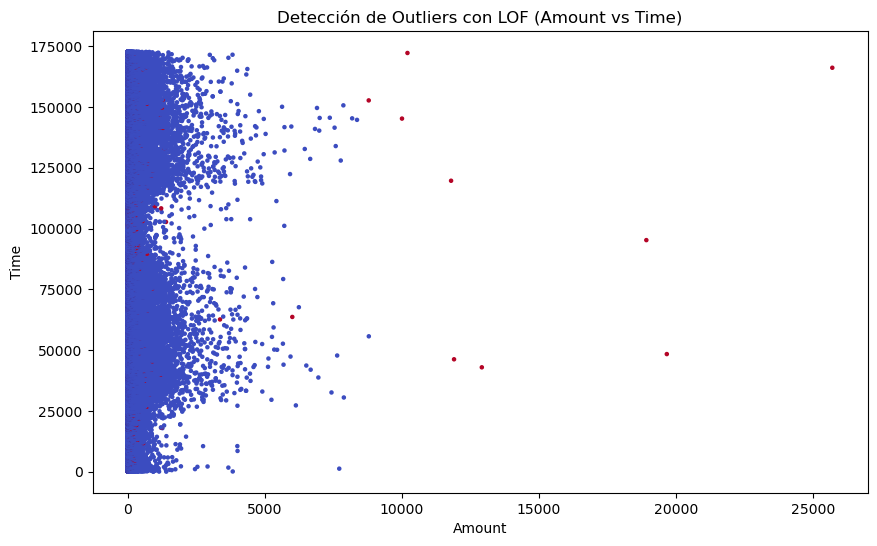

In [5]:
labels = np.where(y_pred == -1, 1, 0)

plt.figure(figsize=(10, 6))
plt.scatter(
    df_creditcard["Amount"],
    df_creditcard["Time"],
    c=labels,         
    cmap="coolwarm",   
    s=5           
)
plt.title("Detección de Outliers con LOF (Amount vs Time)")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()

Normales: 281958
Outliers: 2849


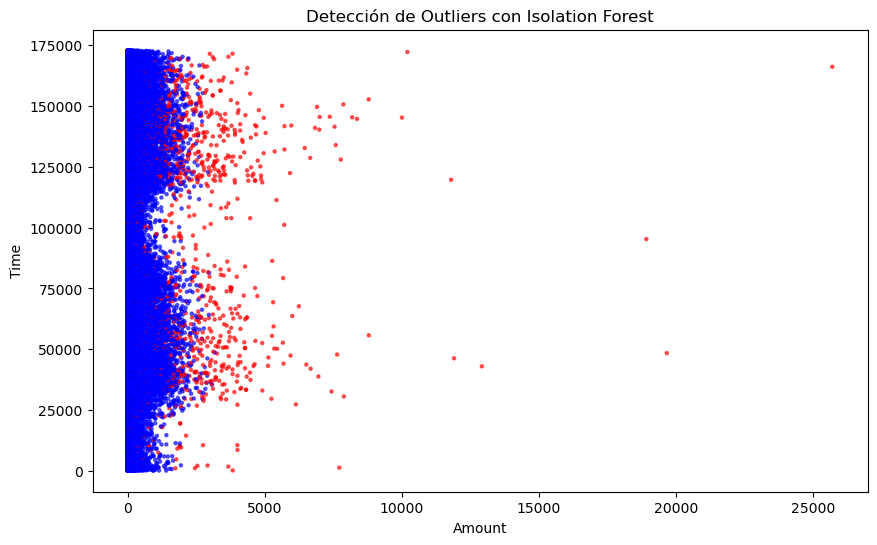

In [ ]:
#Analisis con Isolation forest

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


#Se elimina class
features = df_creditcard.columns.drop("Class")   # si existe columna 'Class'
X = df_creditcard[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


iso = IsolationForest(
    n_estimators=100,   # número de árboles
    contamination=0.01, # % estimado de outliers
    random_state=42,
    n_jobs=-1           # usa todos los núcleos disponibles
)

iso.fit(X_scaled)


y_pred_iso = iso.predict(X_scaled)               
iso_scores = -iso.decision_function(X_scaled)     


df_creditcard["IF_label"] = y_pred_iso
df_creditcard["IF_score"] = iso_scores

# Conteo rápido
n_outliers = (y_pred_iso == -1).sum()
n_normales = (y_pred_iso == 1).sum()
print(f"Normales: {n_normales}")
print(f"Outliers: {n_outliers}")

plt.figure(figsize=(10, 6))

colors = np.where(df_creditcard["IF_label"] == -1, "red", "blue")

plt.scatter(
    df_creditcard["Amount"],
    df_creditcard["Time"],
    c=colors,
    s=5,
    alpha=0.6
)

plt.title("Detección de Outliers con Isolation Forest")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()


Outliers detectados: 69487


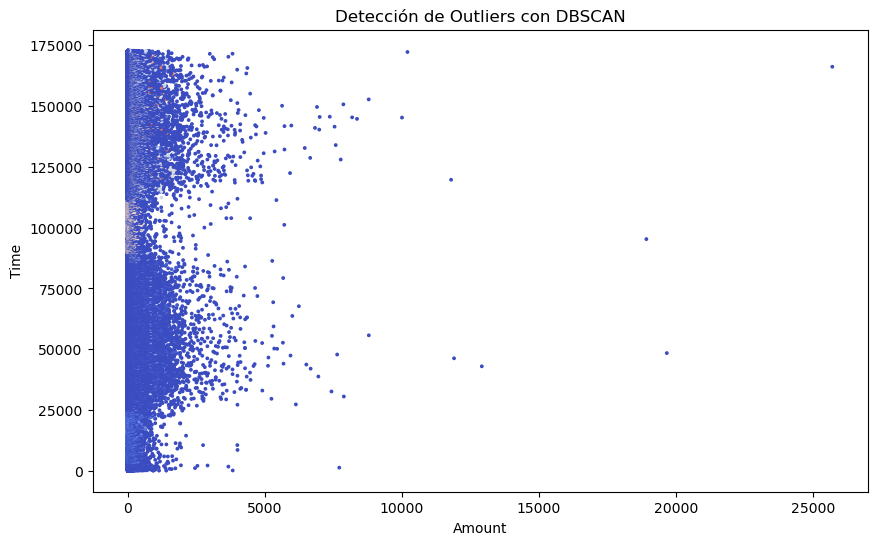

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


features = df_creditcard.columns.drop("Class")  
X = df_creditcard[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(
    eps=2,          # radio máximo para considerar vecinos
    min_samples=10  # mínimo de puntos para formar un cluster denso
)

labels = dbscan.fit_predict(X_scaled)

# labels = -1 significa OUTLIER
df_creditcard["DBSCAN_label"] = labels

# Contar outliers detectados
n_outliers = np.sum(labels == -1)
print(f"Outliers detectados: {n_outliers}")


plt.figure(figsize=(10,6))
plt.scatter(df_creditcard["Amount"], 
            df_creditcard["Time"],
            c=labels,
            cmap="coolwarm",
            s=3)

plt.title("Detección de Outliers con DBSCAN")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()



Observaciones: Creo que para el dataset de credcard el metodo DBSCAN no resulto tan efectivo sin embargo Isolaton forest resulto un poco mas efectivo para la deteccion de estos.